In [121]:
!pip install pandas natasha pymystem3 ipymarkup nltk

In [122]:
import pandas as pd
import pymystem3
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)
from ipymarkup import show_dep_ascii_markup as show_markup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Работа с данными

Спаршенный сайт: [Lenta.ru](https://lenta.ru/)

Парсер: PR_NLP1-parser.py

In [3]:
# Загружаем данные
df = pd.read_csv('articles.csv', sep='\t')

# Удаляем лишние столбцы
morph_df = df.drop(["Unnamed: 0", "created_date"], axis=1)
morph_df

,title,content,category
0,В России начался весенний призыв. Сколько он п...,В России 1 апреля начался весенний призыв на в...,Россия
1,В России начался весенний призыв,В России 1 апреля начался весенний призыв на в...,Россия
2,Российские военные уничтожили место базировани...,Российские Воздушно-космические силы (ВКС) уни...,Мир
3,В России стало сложнее получить права после од...,"Нарушителей правил дорожного движения (ПДД), л...",Россия
4,В России с 1 апреля изменился экзамен на получ...,В России с 1 апреля изменился регламент экзаме...,Россия
...,...,...,...
295,Ряд поездов возобновили движение после обрушен...,Губернатор Смоленской области Василий Анохин з...,Путешествия
296,Убрать статью о дембеле и ограничить права укл...,Комитет Верховной Рады по обороне принял в пер...,Бывший СССР
297,Переспавшая с 500 партнерами порномодель назва...,"Порномодель из Австралии, которую называют «са...",Из жизни
298,Госкомиссия утвердила дату повторного запуска ...,Госкомиссия решила провести пуск первой ракеты...,Наука и техника


# Анализ данных

## Токенизация и лемматизация слов

### Токенизация

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

#Хранилище токенов к каждому предложению
sent_tokens = []

for article in morph_df['content']:
    doc = Doc(article)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    for sentence in doc.sents: # получаем предложения
        # При принте синтаксиса вылетает ошибка "max() iterable argument is empty"
        #sentence.syntax.print()
        sent_tokens.append([])
        for token in sentence.tokens: # получаем токены
            print(token)
            sent_tokens[-1].append(token)



Выходные данные были обрезаны до нескольких последних строк (5000).
DocToken(start=567, stop=568, text='4', id='5_18', head_id='5_16', rel='nmod', pos='ADJ')
DocToken(start=569, stop=575, text='апреля', id='5_19', head_id='5_18', rel='flat', pos='NOUN', feats=<Inan,Gen,Masc,Sing>)
DocToken(start=575, stop=576, text=',', id='5_20', head_id='5_16', rel='punct', pos='PUNCT')
DocToken(start=577, stop=583, text='Зингер', id='5_21', head_id='5_23', rel='nsubj', pos='PROPN', feats=<Anim,Nom,Masc,Sing>)
DocToken(start=584, stop=589, text='снова', id='5_22', head_id='5_23', rel='advmod', pos='ADV', feats=<Pos>)
DocToken(start=590, stop=600, text='арестовали', id='5_23', head_id='5_6', rel='conj', pos='VERB', feats=<Perf,Ind,Plur,Past,Fin,Act>)
DocToken(start=600, stop=601, text='.', id='5_24', head_id='5_6', rel='punct', pos='PUNCT')
DocToken(start=602, stop=612, text='Выяснилось', id='6_1', head_id='6_0', rel='root', pos='VERB', feats=<Perf,Neut,Ind,Sing,Past,Fin,Mid>)
DocToken(start=612, stop

[[['призыв', 'начался'], ['который', None]], [['тысяч', 'сказано'], ['заместитель', None], ['Министерство', 'направлены'], ['он', 'заявил'], ['призыв', None]], [['призыв', 'связано'], [None, 'станет'], ['возраст', 'призывают'], [None, 'составлял']], [['Граждане', None], ['лет', None], ['призыву', None], ['возраст', 'приняли'], ['поправки', None], ['которые', None]], [['Повестки', 'могут']], [['система', 'считается'], [None, 'отлажена'], ['председатель', 'продолжится']], [[None, 'Фото'], ['повестка', 'подчеркнул']], [['Электронная', None], ['парламентарий', 'выросли'], ['размеры', 'могут'], ['штраф', 'могут']], [['которые', 'грозит'], ['взыскание', None], ['Призывников', None], ['которые', 'ожидает']], [['Потеря', 'обойдется'], [None, 'усилили'], [None, 'могут']], [['призыв', 'начался']], [['Кампания', 'сказано'], ['заместитель', 'завершится'], ['он', None], ['Представитель', 'заверил'], ['призыв', None]], [['вице-адмирал', 'связано'], ['это', 'сообщалось']], [['силы', 'уничтожили']], [

### Лемматизация

In [7]:
mystem=pymystem3.Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [69]:

lemma = []

for x in range(len(sent_tokens)):
    lemma.append([])
    for y in range(len(sent_tokens[x])):
        lemma[-1].append(mystem.lemmatize(sent_tokens[x][y].text))

In [72]:
lemma[0]

[['в', '\n'],
 ['россия', '\n'],
 ['1', '\n'],
 ['апрель', '\n'],
 ['начинаться', '\n'],
 ['весенний', '\n'],
 ['призыв', '\n'],
 ['на', '\n'],
 ['военный', '\n'],
 ['служба', '\n'],
 [',\n'],
 ['который', '\n'],
 ['продлиться', '\n'],
 ['по', '\n'],
 ['15', '\n'],
 ['июль', '\n'],
 ['.', '\n']]

## Наиболее встречающиеся пары подлежащих и сказуемых

In [105]:
#Составляем датафрейм с парами
words_pairs = []
for sentance in sent_tokens:
    words_pairs.append([None, None])
    for word in sentance:
        word_role = -1
        match word.rel:
            case 'nsubj':
                word_role = 0
            case 'root':
                word_role = 1
            case _:
                pass
        if word_role > -1:
            if words_pairs[-1][word_role] != None:
                    words_pairs.append([None, None])
            words_pairs[-1][word_role] = mystem.lemmatize(word.text)[0]


words_dict = {
    'pair': []
}

for pair in words_pairs:
  if pair[0] != None:
    if pair[1] != None:
       words_dict['pair'].append(pair[0]+"_"+pair[1])

words_df = pd.DataFrame(words_dict)

words_df

,pair
0,призыв_начинаться
1,тысяча_сказать
2,министерство_направлять
3,он_заявлять
4,призыв_связанный
...,...
2709,интеграция_позволять
2710,роскомнадзор_сокращать
2711,доля_предполагаться
2712,интеллект_становиться


In [85]:
# Векторизация и подсчет популярности
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(words_df['pair'])
pop_count = pd.DataFrame(X.toarray()).sum(axis = 1)
words_df["popularity"] = list(pop_count)


In [100]:
#Выводим топ 10 самых популярным парам
stat_df = words_df.sort_values(by=['popularity'], ascending=False).head(10)
stat_df

,pair,popularity
1821,премьер-министр_заявлять,2
1372,кто-то_считать,2
2000,пресс-служба_сообщать,2
156,пресс-секретарь_заявлять,2
1155,пресс-секретарь_рассказывать,2
2558,премьер-министр_называть,2
21,вице-адмирал_связанный,2
276,генерал-лейтенант_становиться,2
274,генерал-лейтенант_получать,2
1344,вице-премьер_заявлять,2


Исходя из топа по данным с новостного сайта можно сделать вывод о большой политической напряженности в новостной повестке (3 военных термина и 6 политических)

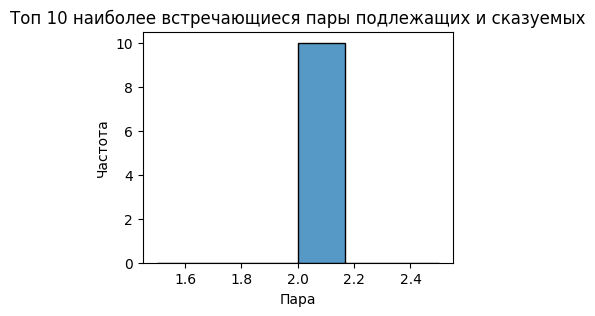

In [133]:
#Гистограмма

plt.figure(figsize=(4, 3))
sns.histplot(stat_df['popularity'], bins=6, edgecolor='black')
plt.title('Топ 10 наиболее встречающиеся пары подлежащих и сказуемых')
plt.xlabel('Пара')
plt.ylabel('Частота')
plt.show()

### Популярные слова

In [125]:
#Чистим датасет от ненужных данных

nltk.download(['averaged_perceptron_tagger_ru', 'stopwords', 'punkt'])

STOP_LIST = nltk.corpus.stopwords.words('russian')

punkt_list = [".", ",", "!", "?", "...", ":", ";"]

for simb in punkt_list:
  STOP_LIST.append(simb)

lemma_words = {
    'word' : []
}

for sent in lemma:
  for word in sent:
    if word[0] not in STOP_LIST:
      #убираем числа
      try:
        if isinstance(int(word[0]), int):
          pass
      except ValueError:
          lemma_words['word'].append(word[0])

lemma_df = pd.DataFrame(lemma_words)

lemma_df

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,word
0,россия
1,апрель
2,начинаться
3,весенний
4,призыв
...,...
42456,принстонский
42457,университет
42458,использовать
42459,анализ


In [128]:
# Высчитываем популярные слова
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(lemma_df['word'])

word_pop_count = pd.DataFrame(X.toarray()).sum(axis = 0)


df_pop_words = pd.DataFrame({'word': vectorizer.get_feature_names_out(),
                            'popularity': word_pop_count})

#Топ 10 популярных слов
pw = df_pop_words.sort_values(by=['popularity'], ascending=False).head(10)
pw

,word,popularity
7679,это,470.0
1468,год,341.0
5899,россия,293.0
2905,который,264.0
7007,украина,251.0
5678,ранее,232.0
1706,день,224.0
546,апрель,189.0
2265,заявлять,185.0
6227,слово,173.0


Исходя из топа, можно сделать вывод по данным с новостного сайта, что в новостном пространстве сильно выражена тема СВО (большое количество слов в новостях "Россия" и "Украина").

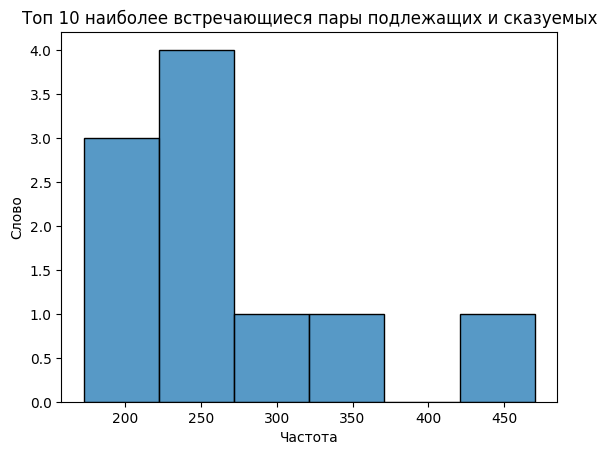

In [136]:
#Гистограмма

plt.figure()
sns.histplot(pw['popularity'], bins=6, edgecolor='black')
plt.title('Топ 10 наиболее встречающиеся пары подлежащих и сказуемых')
plt.xlabel('Частота')
plt.ylabel('Слово')
plt.show()